# *This is an implementation of a network intrusion detection system by using Machine Learning algorithm, specifically a decision tree model with data analysis and performance evaluation*

#Importing Important Libraries



* **import pandas as pd:** This imports the pandas library and allows the user to use its functions for working with data in tabular format.
* **import matplotlib.pyplot as plt**: This imports the matplotlib library and allows the user to use its functions for creating visualizations such as graphs and charts.
* **import numpy as np:** This imports the NumPy library and allows the user to use its functions for performing numerical computations.
* **from sklearn.preprocessing import LabelEncoder, StandardScaler**: This imports the LabelEncoder and StandardScaler classes from the scikit-learn library's preprocessing module, which are used for encoding categorical variables and scaling numerical variables, respectively.
* **from sklearn.preprocessing import label_binarize:** This imports the label_binarize function from the scikit-learn library's preprocessing module, which is used for binarizing multiclass labels into binary labels.
*  **from sklearn.tree import DecisionTreeClassifier:** This imports the DecisionTreeClassifier class from the scikit-learn library's tree module, which is used for building decision tree models.
*  **from sklearn.metrics import accuracy_score, confusion_matrix**: This imports the accuracy_score and confusion_matrix functions from the scikit-learn library's metrics module, which are used for evaluating the performance of a classification model.
*   **from sklearn.metrics import classification_report**: This imports the classification_report function from the scikit-learn library's metrics module, which is used for generating a report that summarizes the classification performance of a model.
*   **from sklearn.metrics import roc_curve, auc:** This imports the roc_curve and auc functions from the scikit-learn library's metrics module, which are used for plotting a receiver operating characteristic (ROC) curve and calculating the area under the curve (AUC) of a binary classification model.
*  ** from sklearn.model_selection import train_test_split:** This imports the train_test_split function from the scikit-learn library's model_selection module, which is used for splitting a dataset into training and testing sets.
*  **from sklearn.model_selection import cross_val_score:** This imports the cross_val_score function from the scikit-learn library's model_selection module, which is used for performing cross-validation on a model.
*  **from sklearn.calibration import calibration_curve**:This imports the calibration_curve function from the scikit-learn library's calibration module, which is used for plotting a calibration curve to assess the calibration of a probabilistic classifier.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.calibration import calibration_curve

import seaborn as sns

#Loading & Analayzing Dataset


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Network Intrusion Detection/networkintrusion.csv')

In [8]:
#The df.head() code displays the first few rows of a Pandas DataFrame, allowing for a quick preview of the data.
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [9]:
# To returns the number of unique values in each column of a pandas DataFrame.
df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3649
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
num_root                         20
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    75
diff_srv_rate               

In [10]:
#df.columns returns a list of column names in the Pandas DataFrame df.
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'num_root', 'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [11]:
#df.describe() returns the statistical summary of the numerical columns in a pandas DataFrame, 
#including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253800e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728493e+05,2.122190e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#df.info() provides a summary of the DataFrame, including the column names, the data types of each column,
#the number of non-null values, and the memory usage. It's a useful method to quickly check the basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [13]:
normal_count = (df["class"] == "normal").sum()
print("Number of rows with normal in class column:", normal_count)

Number of rows with normal in class column: 9711


#Data Preprocessing

In [14]:
# Check for missing values
print(df.isnull().sum())

# Replace missing values with the mean of the corresponding feature column
df.fillna(df.mean(), inplace=True)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

<ipython-input-14-f6667c0a775e>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [15]:
# Separate the features and the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
y

array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
       'anomaly'], dtype=object)

In [17]:
# Encode categorical variables
# This code is used to encode categorical variables as numerical values so that they can be used as input for machine learning algorithms, 
# which typically require numerical inputs. The LabelEncoder function is used to convert the categorical values into a series of integers.
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])

In [18]:
#Scale the features
#This code snippet scales the features of the data to ensure that each feature has the same scale,
#which can improve the performance of machine learning algorithms that rely on distance measures. 
#The StandardScaler() function transforms the data such that its distribution will have a mean of 0 and standard deviation of 1, making it easier to compare features with different scales.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
#Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
X_train.shape

(13526, 39)

#Training The ML Model

**A decision tree**: is a tree-based model used for both classification and regression tasks. 

1.   It works by recursively splitting the dataset into smaller subsets while creating the decision rules
2.   The decision rules are based on the features that best split the data, i.e., the features that provide the most information gain.
1.    The information gain is measured using metrics such as entropy, Gini impurity,or variance reduction.
2.   At each node of the decision tree, the model asks a question based on one of the features, and then moves to one of the two child nodes based on the answer to the question.
1.    This process continues until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples at a leaf node.

When used for classification, the final leaves of the tree correspond to the predicted class labels, and when used for regression, the final leaves correspond to the predicted values.



---



**Cross-validation**: is a technique used to evaluate the performance of a machine learning model. 

1. It involves splitting the available data into two sets: a training set and a validation set.
2. The process is repeated multiple times with different subsets of the data to ensure that the model is not overfitting to the training set. 
1. In k-fold cross-validation, the data is divided into k equal subsets (or folds)
2.  The results are then averaged to give a final performance metric.





In [21]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier()
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

**Notes**

*If the cross-validation scores are much lower than the training scores, it may be a sign of overfitting, meaning the model is fitting too closely to the training data and is not generalizing well to new data. If the cross-validation scores are much higher than the training scores, it may be a sign of underfitting, meaning the model is not fitting the training data well and is not able to capture the patterns in the data.*

In [22]:
cv_scores

array([0.98300074, 0.97744917, 0.97892791, 0.98410351, 0.97449168])

In [23]:
# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Performance Evaluation

In [27]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:', confusion)

Accuracy: 0.983255710800621
Confusion matrix: [[5059   75]
 [  76 3808]]


**A confusion matrix** is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

**A confusion matrix** consists of four numbers, which summarize the number of correct and incorrect predictions made by a classifier:

1.   True Positive (TP): Actual positive instances that are correctly positive.
2.  False Positive (FP): Actual negative instances that are incorrectly classified as positive.
2.  True Negative (TN): Actual negative instances that are correctly classified as negative.
1.   False Negative (FN): Actual positive instances that are incorrectly classified as negative.


By comparing these values, we can evaluate the accuracy of a classifier. It can also be used to calculate other metrics such as precision, recall, and F1-score.

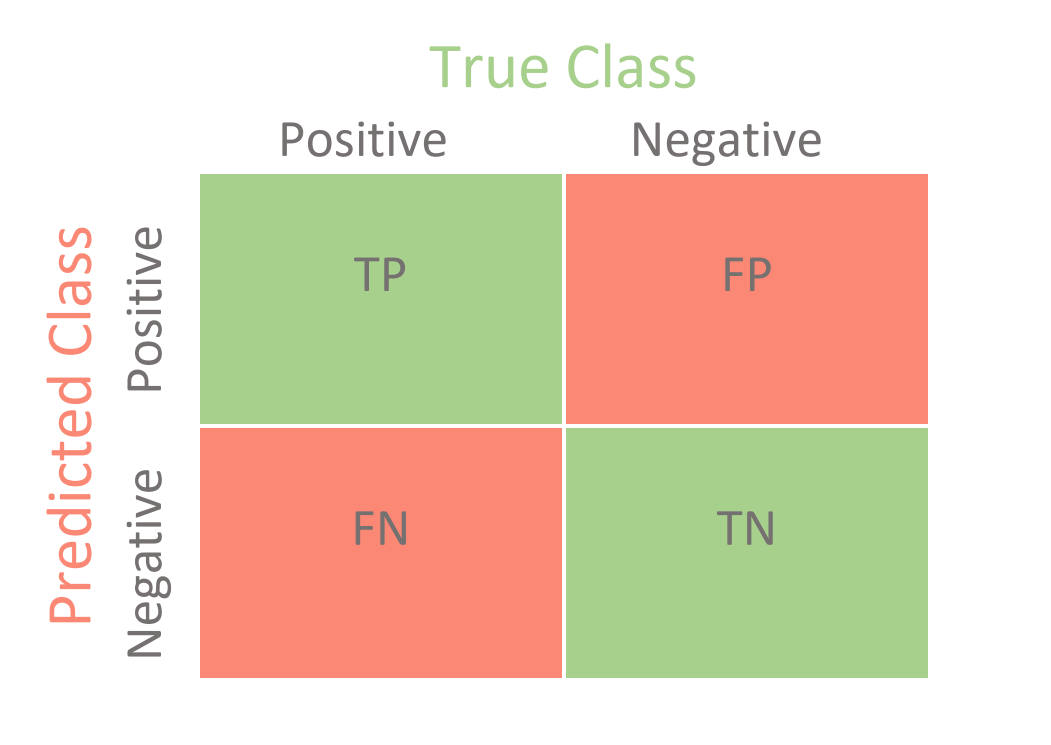

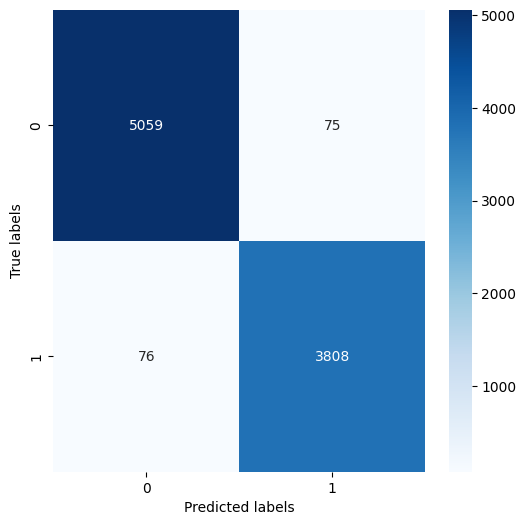

In [29]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d',cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

1.   Accuracy: the proportion of correct predictions to total predictions.
1.   Precision: the proportion of true positives to total positive predictions.
2.   Recall: the proportion of true positives to total actual positives.
2.   F1-score: a harmonic mean of precision and recall, where 1 represents perfect precision and recall.

In [30]:
y_test_pred = dtc.predict(X_test)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      5134
      normal       0.98      0.98      0.98      3884

    accuracy                           0.98      9018
   macro avg       0.98      0.98      0.98      9018
weighted avg       0.98      0.98      0.98      9018



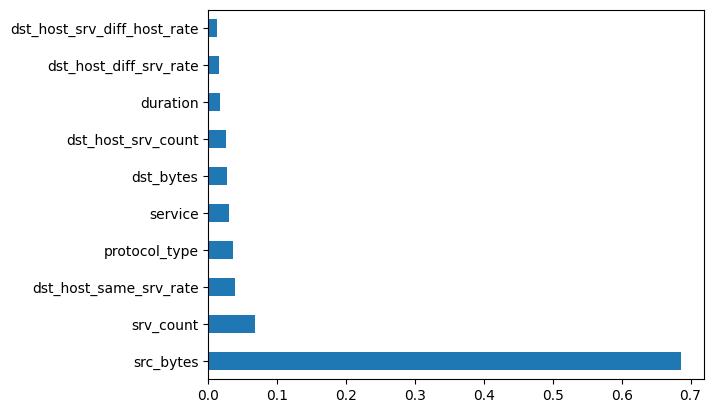

In [31]:
# Plot the feature importances
feat_importances = pd.Series(dtc.feature_importances_, index=df.columns[:-1])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
y_test

array(['normal', 'anomaly', 'normal', ..., 'normal', 'anomaly', 'normal'],
      dtype=object)

**The Receiver Operating Characteristic (ROC) curve** is a graphical representation of the performance of a binary classification model. 

- It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds. 
- The TPR is the proportion of actual positive cases that are correctly classified as positive, while the FPR is the proportion of actual negative cases that are incorrectly classified as positive.
- The curve shows the trade-off between TPR and FPR and is useful in determining the optimal threshold for the model, as well as assessing its overall performance. 

A better model will have a higher area under the ROC curve (AUC), indicating better classification performance.

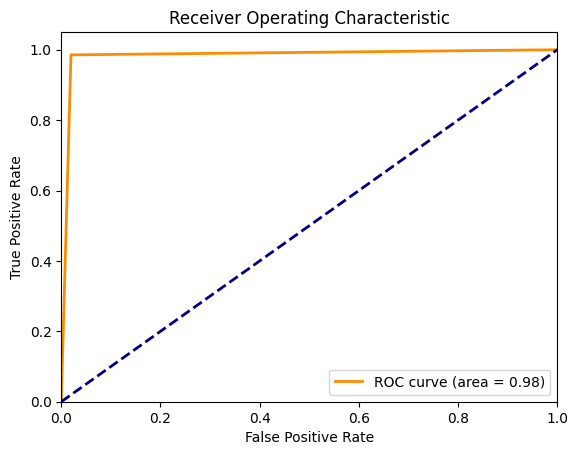

In [33]:
# Convert y_true labels to binary values
y_test_binary = label_binarize(y_test, classes=["normal", "anomaly"])
y_pred_binary = label_binarize(y_pred, classes=["normal", "anomaly"])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_pred_binary.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**The calibration curve** is a graphical representation of the agreement between the observed outcomes and the predicted probabilities of a classification model. 

- In a perfectly calibrated model, the predicted probabilities of the positive class would be equal to the observed probabilities, resulting in a diagonal line from the bottom left corner to the top right corner.

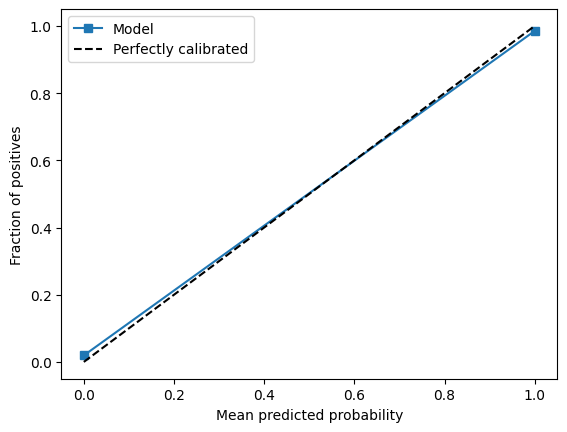

In [34]:
# get the fraction of positives and mean predicted probabilities for each bin
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# plot the calibration curve
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()
